<h1 align="center"><font size="4">Coursera: Introduction to Deep Learning and Neural Networks with Keras (week 5)</font></h1>

<h1 align="center"><font size="5">Project: Build a Regression Model with Keras</font></h1>

## Introduction

This notebook contains the final assignment for the course _IBM AI Engineering: Introduction to Deep Learning and Neural Networks with Keras_ delivered by Coursera.

In this project, we will build a regression model using the _Keras_ libray to characterise the compressive strength of concrete.

According to the submission instructions, the structure of this report will be organised in four part, clearly labeled A, B, C, and D, each worth 5 mark points.

## Dataset preparation

We first start by importing the required libraries.

In [1]:
# Libraries installation if needed
# !pip install numpy==1.21.4
# !pip install pandas==1.3.4
# !pip install keras==2.1.6

In [2]:
%%capture [--no-display]
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

The dataset to use was provided by the course instructors in a csv file, and contains the compressive strength of samples of concret based on the volumes of the different ingredients used to make them. The ingredients include:
1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

We start by downloading the data in a datagframe.

In [3]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


__Data interpretation__: From this dataset, we can see that the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplacticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate, and 676 cubic meter of fine aggregate. This sample id 28 days old, and has a compressive strength of 79.99 MPa.

We now need to inspect the data and potentially take steps to ensure it is accurate and relevant.

In [4]:
# change columns name to remove capital letters
concrete_data.columns = concrete_data.columns.str.lower()
# replace space with underscore
concrete_data.columns = concrete_data.columns.str.replace(r" ", "_")

concrete_data.head(1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


There are no number of symbols contained in the column names.

In [5]:
# Number of concrete samples
print(f"There are {concrete_data.shape[0]} samples of concrete in the dataset")

There are 1030 samples of concrete in the dataset


In [6]:
concrete_data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_data.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

There is not missing value, and nothing looks out of reasonable expectations. The data looks clean and we can proceed with building our model.

## Part A: Build a baseline model

__Instructions__:
Use the Keras library to build a neural network with the following:
- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the 
train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

The first step to build our model with Keras is to import the required libraries

In [8]:
%%capture [--no-display]
# import keras library
import keras

# import additional keras package required for building the model
from keras.models import Sequential
from keras.layers import Dense

We are now going to create a function to define our Keras model.

In [9]:
# define regression model
def regression_model():
    # This function defines the regression model with one hidden layer only with 10 nodes
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape=(n_cols,))) #One hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(1))  # output layer
    
    # compile the model
    model.compile(optimizer='adam', loss='mean_squared_error') #Use the adam optimizer and the mean squared error as the loss function
    
    return model

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the 
train_test_split helper function from Scikit-learn.

Before spliting the data into  training and test sets, we first need to isolate out target and our predictors.

In [10]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'strength']]
target = concrete_data['strength']

Let's inspect the new dataframe with the predictors, and the pandas series with the target.

In [11]:
predictors.head() # strength column has been removed

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
target.head() # only the column 'strength' is left

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64

The values in the predictors dataframe varies in a wide ranges between predictors. We need to normalise the data to prevent one predictor dominating the others.

__Note__: I initially normalised the data as it made sense to me. However, the normalisation of the data will need to be addressed in Part B and has been moved in that section

The last remaining step is to identify the number of predictors, as it will be required when building the network

In [13]:
n_cols = predictors.shape[1]
print(f"There are {n_cols} predictors for our model")

There are 8 predictors for our model


__Train and test the network__

In [14]:
# split the dataset in training and testing sets
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

2. Train the model on the training data using 50 epochs.

In [15]:
# create the model using the function defined before
model = regression_model()

# fit the model on training set
model.fit(x_train, y_train, epochs=50, verbose=1) # verbose to visualise progress

Epoch 1/50
 32/721 [>.............................] - ETA: 4s - loss: 223988.4688

2023-11-10 13:20:15.828515: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-11-10 13:20:15.837384: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394275000 Hz
2023-11-10 13:20:15.838341: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558c674ccdf0 executing computations on platform Host. Devices:
2023-11-10 13:20:15.838389: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-11-10 13:20:15.911901: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

721/721 [==============================] - 0s 341us/step - loss: 164809.2159
Epoch 2/50
721/721 [==============================] - 0s 111us/step - loss: 67503.3465
Epoch 3/50
721/721 [==============================] - 0s 88us/step - loss: 26462.8275
Epoch 4/50
721/721 [==============================] - 0s 106us/step - loss: 11723.7863
Epoch 5/50
721/721 [==============================] - 0s 87us/step - loss: 6707.8320
Epoch 6/50
721/721 [==============================] - 0s 86us/step - loss: 4861.9023
Epoch 7/50
721/721 [==============================] - 0s 76us/step - loss: 4080.8498
Epoch 8/50
721/721 [==============================] - 0s 81us/step - loss: 3628.2201
Epoch 9/50
721/721 [==============================] - 0s 63us/step - loss: 3278.6836
Epoch 10/50
721/721 [==============================] - 0s 74us/step - loss: 2966.0324
Epoch 11/50
721/721 [==============================] - 0s 62us/step - loss: 2669.1118
Epoch 12/50
721/721 [==============================] - 0s 61us/ste

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

In [16]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(x_test)
result = mean_squared_error(y_test, y_predict)
print(f"The mean squared error between the predicted concrete strength and the actual concrete strength is {result}")

The mean squared error between the predicted concrete strength and the actual concrete strength is 208.53674470990944


4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [17]:
%%capture [--no-display]
# create list that will contain the mean squared errors
mean_square_errors_list_A = []

# iterate steps 1-3 50 times
counter = 0
while counter in range(0, 50):
    print(f"Round {counter}")
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3) # step 1
    model.fit(x_train, y_train, epochs=50) # step 2
    y_predict = model.predict(x_test) # step 3
    result = mean_squared_error(y_test, y_predict)
    counter+=1
    
    mean_square_errors_list_A.append(result)


In [18]:
print(mean_square_errors_list_A)

[156.63073989017437, 130.87847160333433, 108.18870390808101, 134.19299146954532, 123.5155764047541, 111.5508998371937, 115.3841478588315, 116.9860347041671, 114.91447999520159, 101.37286795473584, 119.50496653189612, 116.61892480134799, 120.7152150614217, 114.96690573636762, 111.21402075471227, 119.32388671101901, 112.04842532465437, 97.25275981228343, 94.56616997761734, 113.72916298330364, 114.67004799330152, 123.22864394832399, 116.58026329040598, 118.20706475346235, 105.83450431129815, 98.41161021968682, 111.6054163598506, 113.27345993176603, 115.4325208796883, 116.13301758309144, 103.91404317654863, 129.7344871391751, 118.79505505080259, 120.7289981731, 107.03975869450461, 120.8778587836509, 107.01682739340669, 131.008575681749, 120.25499528983701, 100.02688409268177, 120.29005160773217, 107.50896280439588, 108.58687154408803, 108.68007179029831, 105.8739306420485, 107.42146062646921, 113.36660530749856, 123.46071599166766, 112.08537371685414, 104.10991034889733]


5. Report the mean and the standard deviation of the mean squared errors.

In [19]:
# mean of the mean squared errors
mean_sqr_errors_A = statistics.mean(mean_square_errors_list_A)

# standard deviation of the mean squared errors
std_sqr_errors_A = statistics.stdev(mean_square_errors_list_A)

# print answers
print(f"The mean of the mean squared error is {mean_sqr_errors_A} and its standard deviation is {std_sqr_errors_A}")

The mean of the mean squared error is 114.75426676893846 and its standard deviation is 10.616301241837757


This conclude Part A

## Part B: Normalise the data

__Instructions__:
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [20]:
# predictors normalisation
predictors_norm = (predictors-predictors.mean()) / predictors.std()
predictors_norm.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


The data has been normalised. We now need to retrain the model with the new values.

In [21]:
%%capture [--no-display]
# create the model using the function defined before
model_B = regression_model()

# create list that will contain the mean squared errors
mean_square_errors_list_B = []

# iterate steps 1-3 50 times
counter = 0
while counter in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3) # step 1
    model.fit(x_train, y_train, epochs=50) # step 2
    y_predict = model.predict(x_test) # step 3
    result = mean_squared_error(y_test, y_predict)
    counter+=1
    
    mean_square_errors_list_B.append(result)


In [22]:
print(mean_square_errors_list_B)

[218.1037488618076, 115.83718880258775, 91.18769495604582, 60.69843389796072, 53.36486691734539, 42.232604186771134, 43.92867270711726, 38.76606808123326, 40.20609734545815, 34.30828371573747, 39.49833591666611, 42.20007659603272, 35.68336343007764, 40.227557034337906, 33.948573286899865, 35.15918810387714, 35.86215323452249, 31.037809191912295, 33.298405879992, 38.048335425744824, 36.590971595255446, 33.01936249640849, 35.54514609389909, 34.07181764258628, 29.189261859161366, 32.40924583554789, 34.2700594230721, 28.69443428784152, 31.522585632327797, 30.26007277472776, 35.99659568908409, 34.36633099273335, 31.430675934052424, 33.94725213232495, 32.69720572646266, 31.5769205296703, 30.366225670335893, 34.79646092836678, 34.323250752500215, 28.093416875691485, 36.08702870013701, 31.77051804441494, 32.28835341165842, 26.760039853918247, 35.02805760808318, 34.884302743355505, 30.924823719728586, 31.21140196394873, 29.689198311182732, 30.366127698519133]


In [23]:
# mean of the mean squared errors
mean_sqr_errors_B = statistics.mean(mean_square_errors_list_B)

# standard deviation of the mean squared errors
std_sqr_errors_B = statistics.stdev(mean_square_errors_list_B)

# print answers
print(f"The mean of the mean squared error is {mean_sqr_errors_B} and its standard deviation is {std_sqr_errors_B}")

The mean of the mean squared error is 41.51549204998248 and its standard deviation is 29.550926625549604


__Conclusion__:

In [24]:
dict_comparison = {'Index': ['Mean sqr errors', 'std deviation'], 'Model A': [mean_sqr_errors_A, std_sqr_errors_A], 'Model B': [mean_sqr_errors_B, std_sqr_errors_B]}
comparison_df = pd.DataFrame(dict_comparison).set_index('Index')
comparison_df

,Model A,Model B
Index,,
Mean sqr errors,114.754267,41.515492
std deviation,10.616301,29.550927


Text(0, 0.5, 'Mean of mean squared errors')

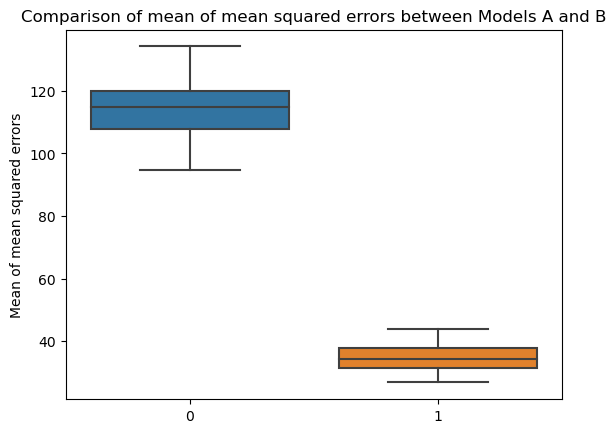

In [25]:
# visualise difference between model A and B
sns.boxplot(data=[mean_square_errors_list_A, mean_square_errors_list_B], showfliers=False)
plt.title("Comparison of mean of mean squared errors between Models A and B")
plt.ylabel("Mean of mean squared errors")

__Question__: How does the mean of the mean squared errors compare to that from Step A?

From the dataframe and graphs above, we can see that the mean of mean squared errors decreased significantly in Model B, after normalisation of the data. 

## Part C: Increase the number of epochs

__Instructions__:
Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [26]:
%%capture [--no-display]
# create the model using the function defined before
model_C = regression_model()

# create list that will contain the mean squared errors
mean_square_errors_list_C = []

# iterate steps 1-3 50 times
counter = 0
while counter in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3) # step 1
    model.fit(x_train, y_train, epochs=100) # step 2
    y_predict = model.predict(x_test) # step 3
    result = mean_squared_error(y_test, y_predict)
    counter+=1
    
    mean_square_errors_list_C.append(result)

In [27]:
print(mean_square_errors_list_C)

[33.109485954044885, 28.666005277260332, 33.88185827106448, 26.682851398889238, 28.775213884621838, 32.42843956297586, 30.46999809937654, 28.20155242083698, 37.64231094411361, 29.412062056852385, 34.10362889701391, 30.484426642370238, 28.95918691320871, 31.74905137821478, 28.854611725342593, 30.018019682180945, 32.361728649957904, 34.20020808415337, 34.36260885862252, 32.7121697900393, 31.286627853821734, 36.08706376851315, 28.98172577522322, 36.00968351027731, 29.25166751612193, 32.7362922554758, 34.22611396765334, 34.41757825479354, 31.142087626419258, 27.803770354965962, 26.584435473748922, 27.951496119441277, 26.314238354494215, 28.048994193327072, 30.242413238494066, 33.49462286507309, 29.30926727188363, 29.42468336503832, 27.149557672707054, 30.055292235565133, 31.321709606673224, 29.01588371675725, 23.945172020086996, 32.768186060008304, 26.740556628854186, 25.138476654193862, 28.05366876731488, 28.40191722306485, 31.282441560758812, 29.561791009666372]


In [28]:
# mean of the mean squared errors
mean_sqr_errors_C = statistics.mean(mean_square_errors_list_C)

# standard deviation of the mean squared errors
std_sqr_errors_C = statistics.stdev(mean_square_errors_list_C)

# print answers
print(f"The mean of the mean squared error is {mean_sqr_errors_C} and its standard deviation is {std_sqr_errors_C}")

The mean of the mean squared error is 30.476456668231144 and its standard deviation is 2.994071807363189


__Conclusion__:

In [29]:
dict_comparison = {'Index': ['Mean sqr errors', 'std deviation'], 'Model B': [mean_sqr_errors_B, std_sqr_errors_B], 'Model C': [mean_sqr_errors_C, std_sqr_errors_C]}
comparison_df = pd.DataFrame(dict_comparison).set_index('Index')
comparison_df

,Model B,Model C
Index,,
Mean sqr errors,41.515492,30.476457
std deviation,29.550927,2.994072


Text(0, 0.5, 'Mean of mean squared errors')

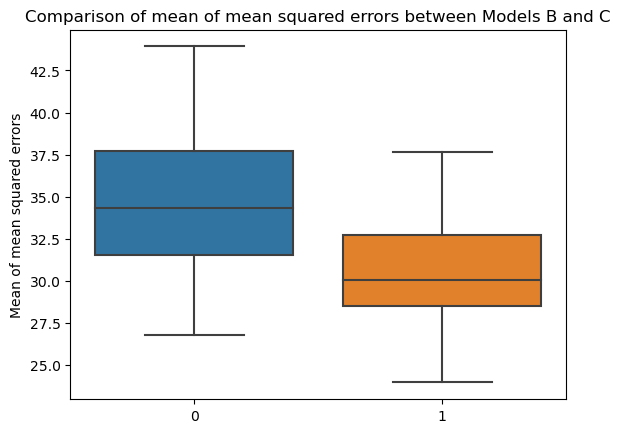

In [30]:
# visualise difference between model B and C
sns.boxplot(data=[mean_square_errors_list_B, mean_square_errors_list_C], showfliers=False)
plt.title("Comparison of mean of mean squared errors between Models B and C")
plt.ylabel("Mean of mean squared errors")

__Question__: How does the mean of the mean squared errors compare to that from Step B?

From the dataframe and graphs above, we can see that the mean of mean squared errors decreased significantly in Model C, after doubling the number of epochs. 

## Part D: Increase the number of hidden layers

__Instructions__:
Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [31]:
def regression_model_D():
    # This function defines the regression model with one hidden layer only with 10 nodes
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape=(n_cols,))) #One hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(10, activation = 'relu')) # second hidden layer
    model.add(Dense(10, activation = 'relu')) # third hidden layer
    model.add(Dense(1))  # output layer
    
    # compile the model
    model.compile(optimizer='adam', loss='mean_squared_error') #Use the adam optimizer and the mean squared error as the loss function
    
    return model

In [32]:
%%capture [--no-display]

# create the model using the function defined before
model_D = regression_model_D()

# create list that will contain the mean squared errors
mean_square_errors_list_D = []

# iterate steps 1-3 50 times
counter = 0
while counter in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3) # step 1
    model.fit(x_train, y_train, epochs=50) # step 2
    y_predict = model.predict(x_test) # step 3
    result = mean_squared_error(y_test, y_predict)
    counter+=1
    
    mean_square_errors_list_D.append(result)


In [33]:
print(mean_square_errors_list_D)

[27.640221521395045, 30.923487691460164, 29.188634219026955, 24.32055039838909, 28.252485510874177, 30.002615380921547, 27.84584471168007, 28.091274652366856, 26.780531424465064, 27.09003631386598, 25.658611291615955, 25.46109139787642, 28.31078668805476, 30.423218772633632, 28.91377851280194, 30.631510358199485, 33.313135366776535, 31.597486896810594, 30.422603467264672, 26.960014351393173, 29.15905276142138, 23.433675452259003, 31.910968376825434, 24.65443513908994, 29.267005182757213, 28.552615040798234, 26.86559678581688, 28.33768372018248, 25.9647515372083, 33.573711917151876, 29.320781932650842, 28.460352879541933, 30.43530406690458, 27.693724092185732, 24.54868420503493, 26.918934186262145, 33.43099052603501, 27.347668047057674, 26.72285745268893, 29.25563037710002, 28.161267710172, 29.890314883236623, 28.79026487481906, 29.96613526879335, 28.185605937788093, 27.27830811350017, 24.274709148034702, 26.297065538886734, 27.965108716749732, 25.579734835471626]


In [34]:
# mean of the mean squared errors
mean_sqr_errors_D = statistics.mean(mean_square_errors_list_D)

# standard deviation of the mean squared errors
std_sqr_errors_D = statistics.stdev(mean_square_errors_list_D)

# print answers
print(f"The mean of the mean squared error is {mean_sqr_errors_D} and its standard deviation is {std_sqr_errors_D}")

The mean of the mean squared error is 28.281417152685936 and its standard deviation is 2.3584083238132356


__Conclusion__:

In [35]:
dict_comparison = {'Index': ['Mean sqr errors', 'std deviation'], 'Model B': [mean_sqr_errors_B, std_sqr_errors_B], 'Model D': [mean_sqr_errors_D, std_sqr_errors_D]}
comparison_df = pd.DataFrame(dict_comparison).set_index('Index')
comparison_df

,Model B,Model D
Index,,
Mean sqr errors,41.515492,28.281417
std deviation,29.550927,2.358408


Text(0, 0.5, 'Mean of mean squared errors')

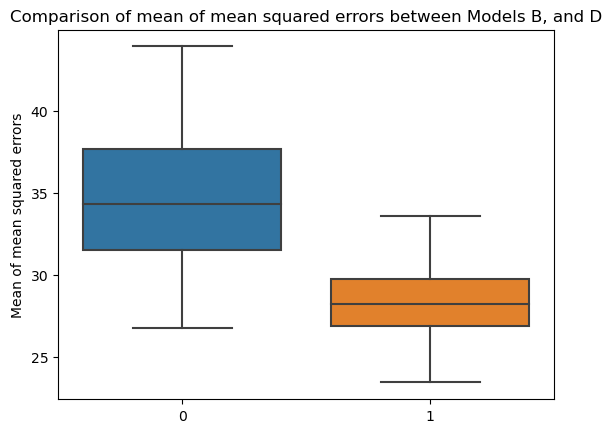

In [36]:
# visualise difference between models B, and D
sns.boxplot(data=[mean_square_errors_list_B, mean_square_errors_list_D], showfliers=False)
plt.title("Comparison of mean of mean squared errors between Models B, and D")
plt.ylabel("Mean of mean squared errors")


__Question__: How does the mean of the mean squared errors compare to that from Step B?

From the dataframe and graphs above, we can see that the mean of mean squared errors decreased significantly in Model D, after adding hidden layers to the model. 

## Thank you for reachin the end of this notebook
I hoped you enjoyed it as much as I did.

This Notebook was created by Bruno Loubiere and submitted on 2023-11-10